Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [207]:
NAME = "Clyde"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
data = pd.read_csv(r'train.csv')
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [211]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [213]:
df.shape

(891, 12)

In [214]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Most of the cabin values are null so removing the column seems best**

In [215]:
df.drop(columns=['Ticket','PassengerId', 'Cabin','Name'], inplace=True)

Text(0, 0.5, 'Distribution of Passengers')

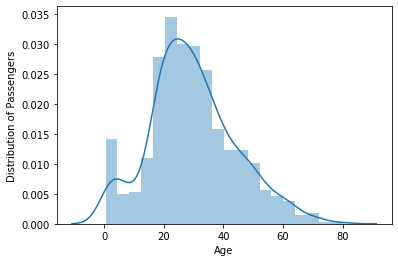

In [216]:
import seaborn as sns
x = df['Age'].dropna()
sns.distplot(x)
plt.xlabel('Age')
plt.ylabel('Distribution of Passengers')

We can see from that a majority of the passengers are between 20-40, there was also a large number of newborns

In [217]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [218]:
df2 = df.groupby(['Sex']).sum()
df2

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [219]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There were almost double the amount of men on the ship compared to the amount of women

In [220]:
print(round(100*109/577, 2), '% of the men aboard survived. \n',
     round(100*233/314, 2), '% of the women aboard survived.')

18.89 % of the men aboard survived. 
 74.2 % of the women aboard survived.


Chances of survival were much higher if you were a women compared to a man

In [221]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
dummies = pd.get_dummies(df['Sex'])
dummies2 = pd.get_dummies(df['Embarked'])
df_new = pd.merge(df,dummies,left_index = True, right_index = True, how='left')
df_merge = pd.merge(df_new,dummies2,left_index = True, right_index = True, how='left')
df_merge.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [223]:
train = df_merge.drop(columns=['Sex', 'Embarked'])

In [224]:
train.dropna(inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

In [225]:
x = train.loc[:, 'Pclass':'S']
y = train['Survived']
x.head()
x.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
C         0
Q         0
S         0
dtype: int64

In [226]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1234)

In [227]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [228]:
y_hat = log_reg.predict(x_test)
yhat_prob = log_reg.predict_proba(x_test)

In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_hat)

0.7622377622377622

From this score we can see that the model could use some improvement. Also, we cannot determine the most important features for survival

In [230]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
y_hat = neigh.predict(x_test)

In [231]:
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Test set Accuracy:  0.7342657342657343


In [233]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_hat = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_hat, y_test) * 100, 2)
print(acc_decisiontree)

76.22
